In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    "font.sans-serif": "Computer Modern Sans serif",
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [3]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
from scipy import interpolate

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
%matplotlib inline
pp.style.use('seaborn-ticks')
sns.set_palette("muted")

In [5]:
data = pd.read_csv('data/Horowitz_Al_Calculation.csv')

In [6]:
data.head()

,theta,q,sigDWsig2,apv,apv_xi05,apv_xi15
0,4.0,0.410312,264.05032,5.839673e-07,5.840293e-07,5.838640e-07
1,4.1,0.420565,232.93959,6.134834e-07,6.135558e-07,6.133625e-07
2,4.2,0.430818,205.83888,6.437072e-07,6.437918e-07,6.435664e-07
3,4.3,0.441071,182.17815,6.746490e-07,6.747472e-07,6.744853e-07
4,4.4,0.451324,161.46741,7.062982e-07,7.064121e-07,7.061085e-07


In [7]:
# Define constants
hbar_c = 0.1973269788 # [GeV fm] PDG 2016

In [8]:
data['dapv'] = np.gradient(data.apv)/np.gradient(data.q)
data['q2'] = np.square(data.q*hbar_c)

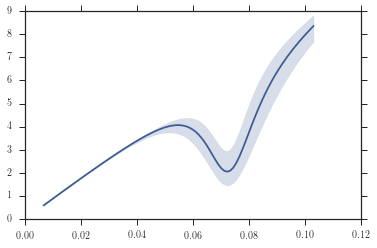

In [34]:
pp.figure(figsize=figsize(1))
pp.plot(data.q2, data.apv*1e6, color=sns.xkcd_rgb['denim blue'])
pp.fill_between(data.q2, data.apv_xi05*1e6, data.apv_xi15*1e6, color=sns.xkcd_rgb['denim blue'], alpha=0.2)
pp.show()

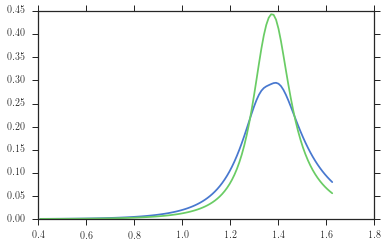

In [42]:
pp.figure(figsize=figsize(1))
pp.plot(data.q, ((data.apv-data.apv_xi15)/data.apv))
pp.plot(data.q, (np.abs(data.apv-data.apv_xi05)/data.apv))
pp.show()

In [43]:
apv_fun = interpolate.interp1d(data.q, data.apv)
apv_xi05_fun = interpolate.interp1d(data.q, data.apv_xi05)
apv_xi15_fun = interpolate.interp1d(data.q, data.apv_xi15)

In [25]:
# EWA Avg
ewa_r_acc = (apv_fun(np.sqrt(0.023522)/hbar_c)*1e6)/2.0812

In [12]:
el_data_avg = pd.read_csv('data/Al_Alloy_4p_DS_DWelastic_run2_avg.dat')
el_data_md = pd.read_csv('data/Al_Alloy_4p_DS_DWelastic_run2.dat')

In [13]:
el_data_avg.head()

,avg,avg_err,chi2,dof,rchi2
rates,1.181200,0.001578,11.420,7,1.6314
yields,148.730000,0.210790,51.475,7,7.3535
theta,7.570600,0.001143,14.544,7,2.0777
q2,0.023522,0.000008,11.149,7,1.5928
asym,2.081200,0.000613,13.930,7,1.9900


In [14]:
el_data_md.head()

,md,rates,rates_err,yields,yields_err,theta,theta_err,q2,q2_err,asym,asym_err
0,1,1.1819,0.004471,149.08,0.60141,7.5705,0.003240,0.023522,0.000021,2.0812,0.001733
1,2,1.1817,0.004462,149.35,0.59841,7.5689,0.003237,0.023512,0.000021,2.0807,0.001738
2,3,1.1855,0.004480,148.81,0.59299,7.5718,0.003241,0.023530,0.000021,2.0816,0.001732
3,4,1.1685,0.004410,144.99,0.58061,7.5810,0.003223,0.023582,0.000021,2.0868,0.001730
4,5,1.1806,0.004472,148.75,0.59658,7.5677,0.003247,0.023502,0.000021,2.0799,0.001739


In [17]:
apv_avg_qq = apv_fun(np.sqrt(el_data_md.q2)/hbar_c)*1e6

In [48]:
apv_avg_qq_lwerr = apv_xi05_fun(np.sqrt(el_data_md.q2)/hbar_c)*1e6-apv_avg_qq, 
apv_avg_qq_herr = apv_avg_qq-apv_xi15_fun(np.sqrt(el_data_md.q2)/hbar_c)*1e6

In [74]:
apv_avg_qq_herr/apv_avg_qq

array([ 0.00378966,  0.0037853 ,  0.00379315,  0.00381574,  0.00378093,
        0.00378311,  0.00378966,  0.00377831])

In [19]:
r_acc_md = apv_avg_qq/el_data_md.asym

In [75]:
r_acc_md_err = np.sqrt(np.square(r_acc_md)*(np.square(apv_avg_qq_herr/apv_avg_qq)+np.square(0.004)))

In [76]:
r_acc_md_err

0    0.005477
1    0.005473
2    0.005480
3    0.005494
4    0.005470
5    0.005471
6    0.005480
7    0.005470
Name: asym, dtype: float64

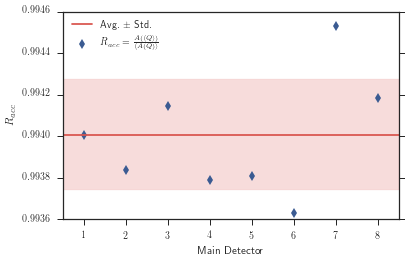

In [90]:
pp.figure(figsize=figsize(1))
pp.errorbar(el_data_md.md, r_acc_md, ls='None', marker='d', color=sns.xkcd_rgb['denim blue'], label='$R_{acc} = \\frac{A(\langle Q \\rangle)}{\langle A(Q) \\rangle}$')
pp.plot([0.5, 8.5], [ewa_r_acc, ewa_r_acc], color=sns.xkcd_rgb['pale red'], label='Avg. $\pm$ Std.')
pp.fill_between([0.5, 8.5], (1+np.std(r_acc_md))*ewa_r_acc, (1-np.std(r_acc_md))*ewa_r_acc, color=sns.xkcd_rgb['pale red'], alpha=0.2)
pp.tick_params(top=False)
pp.xlabel('Main Detector')
pp.ylabel('$R_{acc}$')
pp.xlim(0.5, 8.5)
pp.legend(loc='upper left')
pp.savefig('plots/al_r_acc.png', bbox_inches='tight')
pp.savefig('plots/al_r_acc.pdf', bbox_inches='tight')
pp.savefig('plots/al_r_acc.pgf', bbox_inches='tight')
pp.show()

In [56]:
(data.loc[36].apv_xi15-data.loc[36].apv)/data.loc[36].apv

-0.0038407880016281255

In [58]:
el_data_avg.loc['asym'].avg_err/el_data_avg.loc['asym'].avg

0.00029477224678070346

In [62]:
r_acc_md_err/r_acc_md

0    0.006274
1    0.006271
2    0.006276
3    0.006290
4    0.006269
5    0.006270
6    0.006274
7    0.006267
Name: asym, dtype: float64

In [64]:
np.average(r_acc_md)

0.99399090645970922

In [65]:
np.std(r_acc_md)

0.00026971633068789886

In [67]:
np.std(r_acc_md)/np.average(r_acc_md)

0.00027134687946849103

In [68]:
ewa_r_acc

0.99400642930113625

In [77]:
np.average(r_acc_md_err/r_acc_md)

0.005510011852431055

In [81]:
0.0055*ewa_r_acc

0.0054670353611562493